In [1]:
import numpy as np
import matplotlib.pyplot as plt

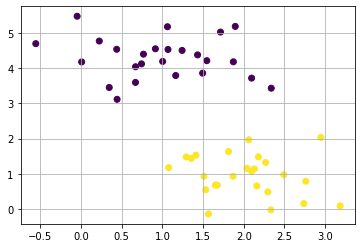

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.grid()
plt.scatter(X[:, 0], X[:, 1], c=y)

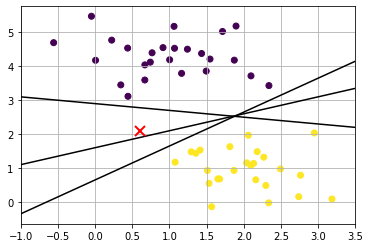

In [3]:
xfit = np.linspace(-1, 3.5)
plt.grid()
plt.scatter(X[:, 0], X[:, 1], c=y)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

#where should this value be classified as?
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

(-1.0, 3.5)

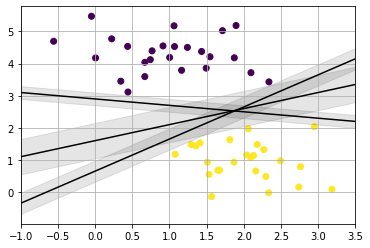

In [4]:
xfit = np.linspace(-1, 3.5)
plt.grid()
plt.scatter(X[:, 0], X[:, 1], c=y)

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d,
                     color='black', alpha=0.1)

plt.xlim(-1, 3.5)


C:\Users\minkh\AppData\Local\Temp/ipykernel_22424/998414326.py:36: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s = '$A \ (6,-1)$', xy = (5,-1), xytext = (6,-1.5))
C:\Users\minkh\AppData\Local\Temp/ipykernel_22424/998414326.py:37: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s = '$B \ (2,3)$', xy = (2,3), xytext = (2,3.5))#, arrowprops = {'width':.2, 'headwidth':8})
C:\Users\minkh\AppData\Local\Temp/ipykernel_22424/998414326.py:38: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s = '$2$', xy = (5,1.2), xytext = (5,1.2) )
C:\Users\minkh\AppData\Local\Temp/ipyker

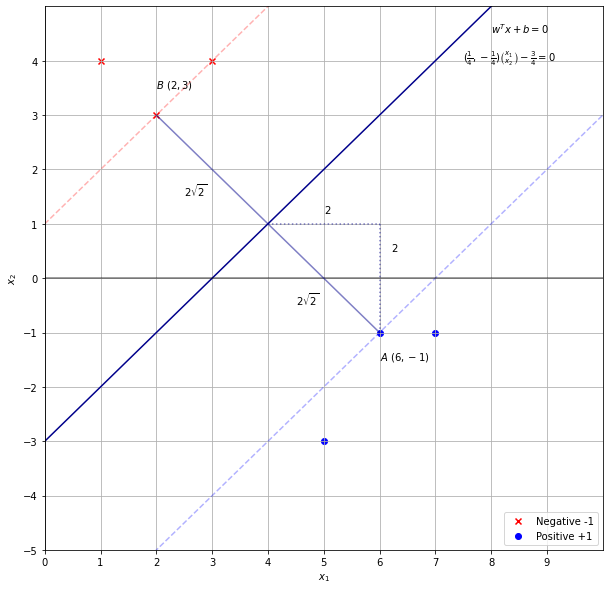

In [7]:
#Data set
x_neg = np.array([[3,4],[1,4],[2,3]])
y_neg = np.array([-1,-1,-1])

x_pos = np.array([[6,-1],[7,-1],[5,-3]])
y_pos = np.array([1,1,1])

x1 = np.linspace(-10,10)
x = np.vstack((np.linspace(-10,10),np.linspace(-10,10)))

#Data for the next section
X = np.vstack((x_pos, x_neg))
y = np.concatenate((y_pos,y_neg))

#Parameters guessed by inspection
w = np.array([1,-1]).reshape(-1,1)
b = -3

#Plot
fig = plt.figure(figsize = (10,10))
plt.scatter(x_neg[:,0], x_neg[:,1], marker = 'x', color = 'r', label = 'Negative -1')
plt.scatter(x_pos[:,0], x_pos[:,1], marker = 'o', color = 'b',label = 'Positive +1')
plt.plot(x1, x1  - 3, color = 'darkblue')
plt.plot(x1, x1  - 7, linestyle = '--', alpha = .3, color = 'b')
plt.plot(x1, x1  + 1, linestyle = '--', alpha = .3, color = 'r')
plt.xlim(0,10)
plt.ylim(-5,5)
plt.xticks(np.arange(0, 10, step=1))
plt.yticks(np.arange(-5, 5, step=1))

#Lines
plt.axvline(0, color = 'black', alpha = .5)
plt.axhline(0,color = 'black', alpha = .5)
plt.plot([2,6],[3,-1], linestyle = '-', color = 'darkblue', alpha = .5 )
plt.plot([4,6],[1,1],[6,6],[1,-1], linestyle = ':', color = 'darkblue', alpha = .5 )

#Annotations
plt.annotate(s = '$A \ (6,-1)$', xy = (5,-1), xytext = (6,-1.5))
plt.annotate(s = '$B \ (2,3)$', xy = (2,3), xytext = (2,3.5))#, arrowprops = {'width':.2, 'headwidth':8})
plt.annotate(s = '$2$', xy = (5,1.2), xytext = (5,1.2) )
plt.annotate(s = '$2$', xy = (6.2,.5), xytext = (6.2,.5))
plt.annotate(s = '$2\sqrt{2}$', xy = (4.5,-.5), xytext = (4.5,-.5))
plt.annotate(s = '$2\sqrt{2}$', xy = (2.5,1.5), xytext = (2.5,1.5))
plt.annotate(s = '$w^Tx + b = 0$', xy = (8,4.5), xytext = (8,4.5))
plt.annotate(s = '$(\\frac{1}{4},-\\frac{1}{4}) \\binom{x_1}{x_2}- \\frac{3}{4} = 0$', xy = (7.5,4), xytext = (7.5,4))

#Labels and show
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc = 'lower right')

plt.grid()

In [9]:
#Importing with custom names to avoid issues with numpy / sympy matrix
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

#Initializing values and computing H. Note the 1. to force to float type
m,n = X.shape
y = y.reshape(-1,1) * 1.
X_dash = y * X
H = np.dot(X_dash , X_dash.T) * 1.

#Converting into cvxopt format
P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(-np.eye(m))
h = cvxopt_matrix(np.zeros(m))
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))

#Setting solver parameters (change default to decrease tolerance) 
cvxopt_solvers.options['show_progress'] = False
cvxopt_solvers.options['abstol'] = 1e-10
cvxopt_solvers.options['reltol'] = 1e-10
cvxopt_solvers.options['feastol'] = 1e-10

#Run solver
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])

In [10]:
#w parameter in vectorized form
w = ((y * alphas).T @ X).reshape(-1,1)

#Selecting the set of indices S corresponding to non zero parameters
S = (alphas > 1e-4).flatten()

#Computing b
b = y[S] - np.dot(X[S], w)

#Display results
print('Alphas = ',alphas[alphas > 1e-4])
print('w = ', w.flatten())
print('b = ', b[0])

Alphas =  [0.0625     0.06249356]
w =  [ 0.24999356 -0.25000644]
b =  [-0.74996781]


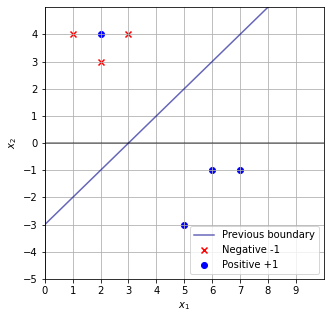

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x_neg = np.array([[3,4],[1,4],[2,3]])
y_neg = np.array([-1,-1,-1])
x_pos = np.array([[6,-1],[7,-1],[5,-3],[2,4]])
y_pos = np.array([1,1,1,1])
x1 = np.linspace(-10,10)
x = np.vstack((np.linspace(-10,10),np.linspace(-10,10)))


fig = plt.figure(figsize = (5,5))
plt.scatter(x_neg[:,0], x_neg[:,1], marker = 'x', color = 'r', label = 'Negative -1')
plt.scatter(x_pos[:,0], x_pos[:,1], marker = 'o', color = 'b',label = 'Positive +1')
plt.plot(x1, x1  - 3, color = 'darkblue', alpha = .6, label = 'Previous boundary')
plt.xlim(0,10)
plt.ylim(-5,5)
plt.xticks(np.arange(0, 10, step=1))
plt.yticks(np.arange(-5, 5, step=1))

#Lines
plt.axvline(0, color = 'black', alpha = .5)
plt.axhline(0,color = 'black', alpha = .5)


plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.legend(loc = 'lower right')
plt.grid()

#New dataset (for later)
X = np.array([[3,4],[1,4],[2,3],[6,-1],[7,-1],[5,-3],[2,4]] )
y = np.array([-1,-1, -1, 1, 1 , 1, 1 ])


In [12]:
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

#Initializing values and computing H. Note the 1. to force to float type
C = 10
m,n = X.shape
y = y.reshape(-1,1) * 1.
X_dash = y * X
H = np.dot(X_dash , X_dash.T) * 1.

#Converting into cvxopt format - as previously
P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(np.vstack((np.eye(m)*-1,np.eye(m))))
h = cvxopt_matrix(np.hstack((np.zeros(m), np.ones(m) * C)))
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))

#Run solver
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])

#==================Computing and printing parameters===============================#
w = ((y * alphas).T @ X).reshape(-1,1)
S = (alphas > 1e-4).flatten()
b = y[S] - np.dot(X[S], w)

#Display results
print('X: ', X)
print('Alphas: ', alphas)
print('Alphas = ',alphas[alphas > 1e-4])
print('w = ', w.flatten())
print('b = ', b[0])

X:  [[ 3  4]
 [ 1  4]
 [ 2  3]
 [ 6 -1]
 [ 7 -1]
 [ 5 -3]
 [ 2  4]]
Alphas:  [[5.00000000e+00]
 [1.52461667e-12]
 [6.31250000e+00]
 [1.31250000e+00]
 [2.36607341e-12]
 [1.32909858e-11]
 [1.00000000e+01]]
Alphas =  [ 5.      6.3125  1.3125 10.    ]
w =  [ 0.25 -0.25]
b =  [-0.75]


In [13]:
from sklearn.svm import SVC

clf = SVC(C = 10, kernel = 'linear')
clf.fit(X, y.ravel()) 

print('w = ',clf.coef_)
print('b = ',clf.intercept_)
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))

w =  [[ 0.25 -0.25]]
b =  [-0.75]
Indices of support vectors =  [0 2 3 6]
Support vectors =  [[ 3.  4.]
 [ 2.  3.]
 [ 6. -1.]
 [ 2.  4.]]
Number of support vectors for each class =  [2 2]
Coefficients of the support vector in the decision function =  [[ 5.      6.3125  1.3125 10.    ]]


Accuracy: 1.0


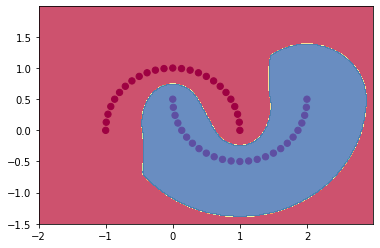

In [14]:
import cvxopt
from sklearn import datasets

#here I use z instead of xprime since I don't know how to write prime in code....
def linear(x, z):
    return np.dot(x, z.T)

def polynomial(x, z, p=5):
    return (1 + np.dot(x, z.T)) ** p

def gaussian(x, z, sigma=0.1):
    return np.exp(-np.linalg.norm(x - z, axis=1) ** 2 / (2 * (sigma ** 2)))

def plot_contour(X, y, svm):
    # plot the resulting classifier
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    points = np.c_[xx.ravel(), yy.ravel()]

    Z = svm.predict(points)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

    # plt the points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)


class SVM:
    def __init__(self, kernel=gaussian, C=1):
        self.kernel = kernel
        self.C = C

    def fit(self, X, y):
        self.y = y
        self.X = X
        m, n = X.shape

        # Calculate Kernel
        self.K = np.zeros((m, m))
        for i in range(m):
            self.K[i, :] = self.kernel(X[i, np.newaxis], self.X)

        # Solve with cvxopt final QP needs to be reformulated
        # to match the input form for cvxopt.solvers.qp
        P = cvxopt.matrix(np.outer(y, y) * self.K)
        q = cvxopt.matrix(-np.ones((m, 1)))
        G = cvxopt.matrix(np.vstack((np.eye(m) * -1, np.eye(m))))
        h = cvxopt.matrix(np.hstack((np.zeros(m), np.ones(m) * self.C)))
        A = cvxopt.matrix(y, (1, m), "d")
        b = cvxopt.matrix(np.zeros(1))
        cvxopt.solvers.options["show_progress"] = False
        sol = cvxopt.solvers.qp(P, q, G, h, A, b)
        self.alphas = np.array(sol["x"])

    def predict(self, X):  #<----this is X_test
        y_predict = np.zeros((X.shape[0]))
        sv = self.get_parameters(self.alphas)

        for i in range(X.shape[0]):
            y_predict[i] = np.sum(
                self.alphas[sv]
                * self.y[sv, np.newaxis]
                * self.kernel(X[i], self.X[sv])[:, np.newaxis]
            )

        return np.sign(y_predict + self.b)

    def get_parameters(self, alphas):
        threshold = 1e-5

        sv = ((alphas > threshold) * (alphas < self.C)).flatten()
        self.w = np.dot(self.X[sv].T, alphas[sv] * self.y[sv, np.newaxis])
        self.b = np.mean(
            self.y[sv, np.newaxis]
            - self.alphas[sv] * self.y[sv, np.newaxis] * self.K[sv, sv][:, np.newaxis]
        )
        return sv
    
if __name__ == "__main__":
    X, y = datasets.make_moons(50)
    
    #transform our y to be -1 and 1 to meet svm purpose
    y[y==0] = -1
    
    svm = SVM(kernel=gaussian)
    svm.fit(X, y)
    y_pred = svm.predict(X)
    plot_contour(X, y, svm)

    print(f"Accuracy: {sum(y==y_pred)/y.shape[0]}")

In [15]:
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

#this code will run very long time!!!

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
assert X_train.shape[0] == y_train.shape[0]

#select the type of hyperplane used to separate the data
kernel = ['linear', 'rbf']

#regularized penalty
#when C is small, classifier is ok with misclassified data
#when C is large, classifier is heavily penalized for misclassified data
C_range = [1, 2]

#parameter for RBF kernel, increasing gamma
#allows for more complex decision boundary but can lead
#to overfitting
gamma_range = [0.0001, 0.0005]

param_grid = dict(gamma=gamma_range, C=C_range, kernel=kernel)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train)

print("=========Best parameters=======")
print(f"The best parameters are {grid.best_params_} with" +
          f"a score of {grid.best_score_:.2f}")

model = grid.best_estimator_

model.fit(X_train, y_train)
yhat = model.predict(X_test) #svm use this instead

#plot precision recall curve
from sklearn.metrics import average_precision_score, classification_report, confusion_matrix
print("=========Average precision score=======")
print(average_precision_score(y_test, yhat))
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

"""
If you want better score, try larger range of params...I tried only a few so not to slow
down my computer.
"""

=========Best parameters=======
The best parameters are {'C': 2, 'gamma': 0.0001, 'kernel': 'linear'} witha score of 0.89
=========Average precision score=======
0.5797619047619048
=========Classification report=======
Report:                precision    recall  f1-score   support

          -1       0.71      0.62      0.67         8
           1       0.62      0.71      0.67         7

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.67        15
weighted avg       0.67      0.67      0.67        15



'\nIf you want better score, try larger range of params...I tried only a few so not to slow\ndown my computer.\n'